# How does Metadensity Work
This notebook visualizes every step of Metadenisty

In [1]:
# set up files associated with each genome coordinates
import metadensity as md
md.settings.from_config_file('/home/hsher/Metadensity/config/hg38.ini')


# then import the modules
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt


# I have a precompiles list of ENCODE datas as a csv that loads in this dataloader
import sys
sys.path.append('/home/hsher/Metadensity/scripts')
from dataloader import *
%matplotlib inline

plt.style.use('seaborn-white')


# build 1 dataset for visualizting intermediates
SF3B4 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'SF3B4')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)

def build_idr_metatruncate(eCLIP, transcript = ['ENST00000367078.8','ENST00000338591.8']):
    ''' build metadensity object for eCLIP and its idr peak containing transcript'''
    m = Metatruncate(eCLIP, eCLIP.name,
                     background_method = 'relative information',
                     normalize = False,
                    transcript_ids = transcript)
    m.get_density_array(use_truncation = True)
    return m
meta = build_idr_metatruncate(SF3B4)

Using /home/hsher/gencode_coords/GRCh38.p13.genome.fa
using /home/hsher/gencode_coords/GRCh38.p13.genome.fa
Using:  /home/hsher/gencode_coords/gencode.v33.transcript.gff3
Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


## `Metadensity` Object Contains many genes

### Here we only computed 2 genes `'ENST00000367078.8'` `'ENST00000338591.8'` for the sake of time

In [2]:
# what gene/transcripts is being computed, show 3 of them
list(meta.metagene.keys())[:3]

['ENST00000367078.8', 'ENST00000338591.8']

In [3]:
# pick a random gene
one_gene = meta.metagene['ENST00000367078.8']

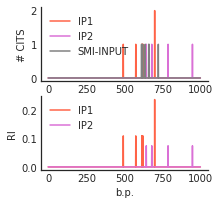

In [4]:
# show raw data
f, ax = plt.subplots(2,1,figsize = (3,3))
# IPs
ax[0].plot(one_gene.sites[SF3B4.uID]['rep1'][:1000], label = 'IP1', color = 'tomato')
ax[0].plot(one_gene.sites[SF3B4.uID]['rep2'][:1000], label = 'IP2', color = 'orchid')
ax[0].plot(one_gene.sites[SF3B4.uID]['ctrl'][:1000], label = 'SMI-INPUT', color = 'grey')
ax[0].set_ylabel('# CITS')
ax[0].legend()


# show normalized data
ax[1].plot(one_gene.value[SF3B4.uID]['rep1'][:1000], color = 'tomato', label = 'IP1')
ax[1].plot(one_gene.value[SF3B4.uID]['rep2'][:1000], color = 'orchid', label = 'IP2')
ax[1].set_ylabel('RI')
ax[1].set_xlabel('b.p.')
ax[1].legend()

sns.despine()


In [5]:
# pick a random gene
the_other_gene = meta.metagene['ENST00000338591.8']

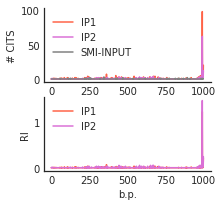

In [6]:
# show raw data
f, ax = plt.subplots(2,1,figsize = (3,3))
# IPs
ax[0].plot(the_other_gene.sites[SF3B4.uID]['rep1'][:1000], label = 'IP1', color = 'tomato')
ax[0].plot(the_other_gene.sites[SF3B4.uID]['rep2'][:1000], label = 'IP2', color = 'orchid')
ax[0].plot(the_other_gene.sites[SF3B4.uID]['ctrl'][:1000], label = 'SMI-INPUT', color = 'grey')
ax[0].set_ylabel('# CITS')
ax[0].legend()


# show normalized data
ax[1].plot(the_other_gene.value[SF3B4.uID]['rep1'][:1000], color = 'tomato', label = 'IP1')
ax[1].plot(the_other_gene.value[SF3B4.uID]['rep2'][:1000], color = 'orchid', label = 'IP2')
ax[1].set_ylabel('RI')
ax[1].set_xlabel('b.p.')
ax[1].legend()

sns.despine()


## Density at each feature
Every feature is simply a window around the transcript/gene.
The windowed value for every transcript, is stored in `density_array`.

In [7]:
meta.density_array['branchpoint', 'left', 'rep1'].shape # n_samples * length_feature. 
# by default the branchpoint "window" 50 nt at each side
# left means "5 \prime to "
# right means "3 \prime to"

(2, 50)

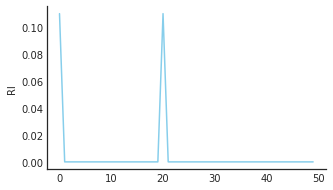

In [8]:
f, ax = plt.subplots(1,1, figsize = (5,3), sharey = True)
ax.plot(meta.density_array['branchpoint', 'left', 'rep1'][0,:], color = 'skyblue')
ax.plot(meta.density_array['branchpoint', 'left', 'rep1'][1,:], color = 'royalblue')

ax.set_ylabel('RI')
sns.despine()
